### Q.) Do the following on titanic dataset
### I. Load the dataset into python environment
### II. Do all the necessary pre-processing steps
### III. Create kNN and SVM models
### IV. Do k-fold and stratified k-fold cross validation techniques and find the average accuracy score of the models
************************************************************

In [106]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

### I. Load the dataset into python environment

In [107]:
# loading the dataset into python environment  and making ‘PassengerId’ as the index column
data = pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

In [108]:
# display the first 5 rows of the dataframe
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
# Print information about the dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


~ the columns 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' are of type object.

~ Dataframe is having 891 rows

### II. Do all the necessary pre-processing steps

In [110]:
# count of null values 
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

~ The columns 'Age', 'Cabin' and 'Embarked' are having 177, 687 and 2 null values.

In [111]:
# find the percentage of missing values
data.isnull().sum()*100/len(data) 

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

~ For 'Cabin' column from the dataframe , 77.104377 % of the data are null values, dropping that column from the dataframe will be the best option. If  the null values of  'Cabin' column are filled with mode, there is a chance for biasing  in our data set.


In [112]:
# dropping 'Cabin' column 
data.drop('Cabin', axis=1, inplace = True)

In [113]:
# displaying the first 5 rows  after dropping 'Cabin' column
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [114]:
# number of rows and columns 
data.shape

(891, 10)

~It is having 891 rows and 10 columns

In [115]:
# display the summary statistics of all numerical columns
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
# display the summary statistics of categorical columns
data.describe(include=['O']) 

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


#### (*) Fill in all the missing values present in the columns in the dataset

In [117]:
# count of null values 
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

~ The columns 'Age'  and 'Embarked' are having 177 and 2 null values

##### 'Age' column

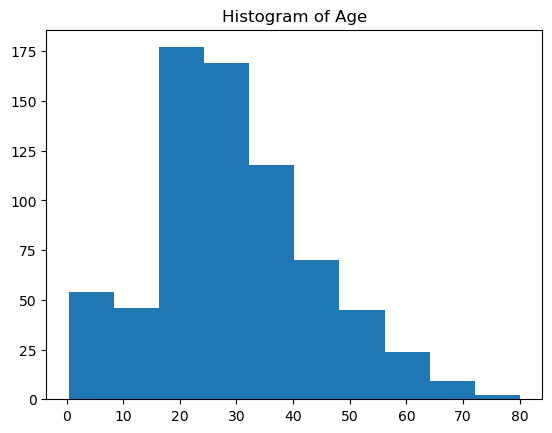

In [118]:
# plotting histogram of 'Age' column
plt.hist(data['Age'])

# display the title 
plt.title("Histogram of Age");

In [119]:
# skewness of each numerical column in the dataframe
data.skew(axis=0, numeric_only=True)

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

~ The above histogram of 'Age' column is right skewed, so using median to fill in all the missing values under 'Age' column since mean is affected by extreme values.

In [120]:
# filling missing values in 'Age' column with median
data['Age'] = data['Age'].fillna(data['Age'].median())

##### 'Embarked' column

In [121]:
# displaying the mode of 'Embarked' column 
data['Embarked'].mode()[0]

'S'

In [122]:
# filling missing values in 'Embarked' column with mode since it is a categorical column
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [123]:
# count of null values
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

~ From the above display, there are no null values in the dataframe

In [124]:
# filtering out object features and displaying it
object_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']
object_feature

['Name', 'Sex', 'Ticket', 'Embarked']

In [125]:
# filtering out numerical features and displaying it
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
numerical_feature

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [126]:
# displaying unique values in numerical features
for i in numerical_feature:
    print(f"{i} column \n")    
    nuni = data[i].nunique()
    print(f"Count of unique values = {nuni}\n")    
    uni = data[i].unique()
    print(f"Unique values = {uni}\n\n\n")  

Survived column 

Count of unique values = 2

Unique values = [0 1]



Pclass column 

Count of unique values = 3

Unique values = [3 1 2]



Age column 

Count of unique values = 88

Unique values = [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]



SibSp column 

Count of unique values = 7

Unique values = [1 0 3 4 2 5 8]



Parch column 

Count of unique values = 7

Unique values = [0 1 2 5 3 4 6]



Fare column 

Count of unique values = 248

Unique values = [  7.25    71.2833   7.925   53.1      8.05     8.4583 

In [127]:
# filtering discrete numerical features
discrete_numerical_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 8]
discrete_numerical_feature

['Survived', 'Pclass', 'SibSp', 'Parch']

In [128]:
# filtering continuous numerical features
continuous_numerical_feature = [feature for feature in numerical_feature if feature not in discrete_numerical_feature]
continuous_numerical_feature

['Age', 'Fare']

#### (*) Outliers in continuous numerical features

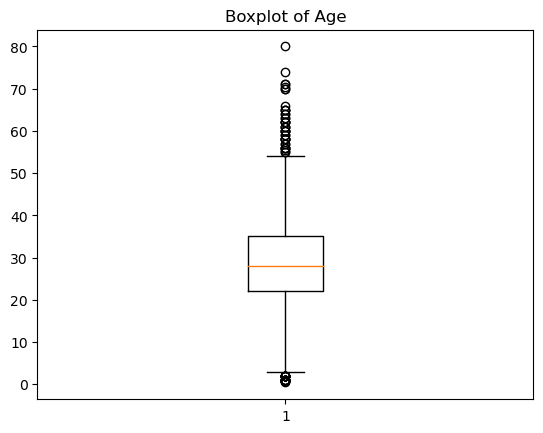

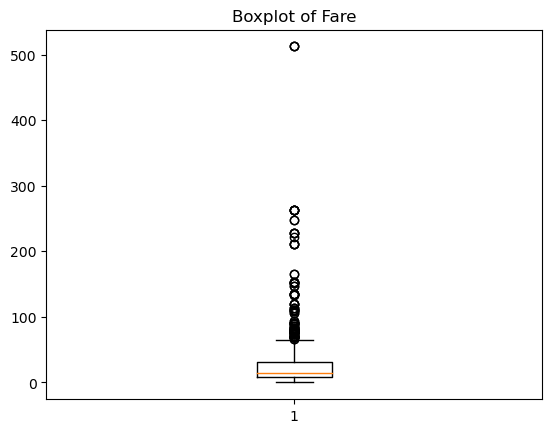

In [129]:
# boxplot of outliers in continuous numerical feature
for i in continuous_numerical_feature:
    
    # boxplot of columns
    plt.boxplot(data[i])
    text = "Boxplot of"
    
    # display title
    plt.title(text+" "+i)
    plt.show()

~ from the above boxplots, outliers are found in 'Age' and 'Fare' columns

In [130]:
# display outliers present in continuous numerical feature
for i in continuous_numerical_feature:
    
    # display column name
    print(f"{i} column\n")
    
    # display first quartile
    Q1_i = np.percentile(data[i], 25, interpolation='midpoint')
    print(f"First Quartile = {Q1_i}")
    
    # display second quartile
    Q2_i = np.percentile(data[i], 50, interpolation='midpoint')
    print(f"Second Quartile = {Q2_i}")
    
    # display third quartile
    Q3_i = np.percentile(data[i], 75, interpolation='midpoint')
    print(f"Third Quartile = {Q3_i}")
    
    # display interquartile range
    IQR_i =  Q3_i-Q1_i
    print(f"IQR = {IQR_i}")
    
    # display lower whisker
    low_i = Q1_i-1.5*IQR_i
    print(f"lower whisker = {low_i}")
    
    # display upper whisker
    up_i = Q3_i+1.5*IQR_i
    print(f"upper whisker = {up_i}\n")
    
    # display outliers in columns
    outlier_i = [] 
    for x_i in data[i]:
        if((x_i > up_i) or (x_i < low_i)):
            outlier_i.append(x_i) 
    print(f"Outliers = {outlier_i}\n\n\n")
        

Age column

First Quartile = 22.0
Second Quartile = 28.0
Third Quartile = 35.0
IQR = 13.0
lower whisker = 2.5
upper whisker = 54.5

Outliers = [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]



Fare column

First Quartile = 7.9104
Second Quartile = 14.4542
Third Quartile = 31.0
IQR = 23.0896
lower whisker = -26.724
upper whisker = 65.6344

Outliers = [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 26

#### (*) EDA 

In [131]:
# display count of unique values in 'Survived' column
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [132]:
# extracting different categories in 'Survived' column
survived_labels = data['Survived'].value_counts().index
survived_labels

Int64Index([0, 1], dtype='int64')

In [133]:
# extract count of unique values in each category in 'Survived' column
survived_value = data['Survived'].value_counts().values
survived_value

array([549, 342], dtype=int64)

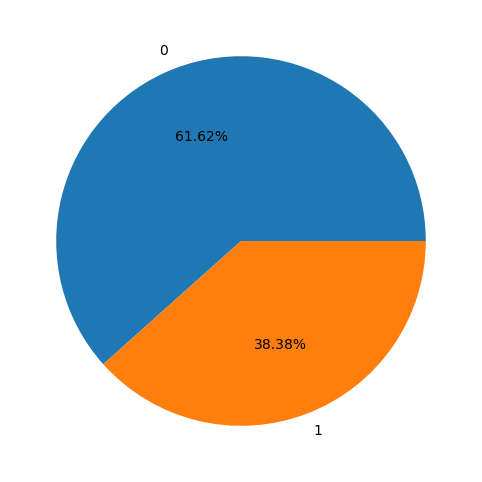

In [134]:
# setting a plotting area
plt.figure(figsize=(10,6))

# creating a pie chart for each category in 'Survived' column
plt.pie(survived_value, labels = survived_labels, autopct = '%1.2f%%');

In [135]:
# count of number of passengers survived with respect to 'Sex'
data.groupby(['Sex','Survived']).agg({'Survived' :['count']}) 

Survived
                   count
Sex    Survived         
female 0              81
       1             233
male   0             468
       1             109

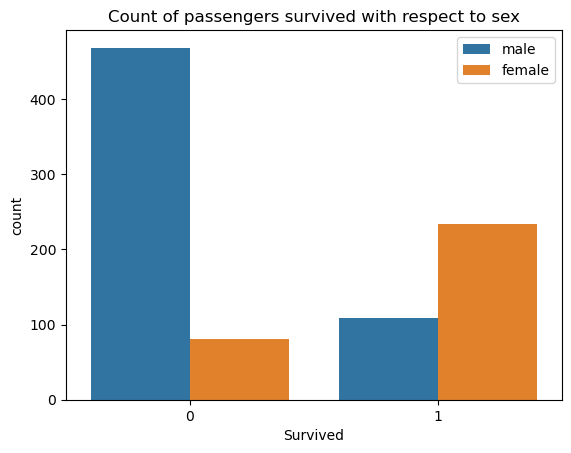

In [136]:
# plotting count number of passengers survived with respect to 'Sex'
sns.countplot(x ='Survived', hue='Sex', data = data)

# display title
plt.title("Count of passengers survived with respect to sex")

# display legend
plt.legend();

~ 342 passengers only survived, out of which 233 are females and 109 are males

In [137]:
# display the details of passengers travelling alone [SibSp == 0.0000, Parch == 0.0000]
data.loc[(data.SibSp == 0.0000) & (data.Parch == 0.0000)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


~ 537 passengers out of 891 passengers are travelling alone

In [138]:
# chance of survival with respect to 'Pclass'
data.groupby(['Pclass','Survived']).agg({'Survived' :['count']}) 

Survived
                   count
Pclass Survived         
1      0              80
       1             136
2      0              97
       1              87
3      0             372
       1             119

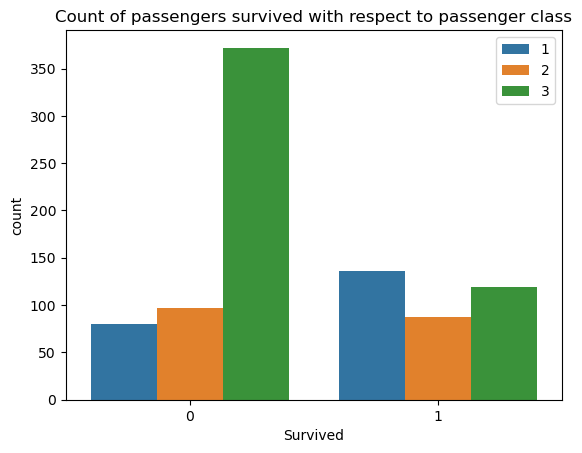

In [139]:
# plotting count of passengers survived with respect to 'Pclass'
sns.countplot(x ='Survived', hue='Pclass', data = data)

# display title
plt.title("Count of passengers survived with respect to passenger class")

# display legend
plt.legend();

~ First class (Pclass=1) passengers had a much better chance of survival than second class (Pclass=2) travellers

In [140]:
# chance of survival with respect to 'Pclass' and 'Sex'
data.groupby(['Pclass', 'Sex','Survived']).agg({'Survived' :['count']}) 

Survived
                          count
Pclass Sex    Survived         
1      female 0               3
              1              91
       male   0              77
              1              45
2      female 0               6
              1              70
       male   0              91
              1              17
3      female 0              72
              1              72
       male   0             300
              1              47

~ Within each 'Pclass', females had a much better chance of survival than males

In [141]:
# chance of survival with respect to 'SibSp'
data.groupby(['SibSp','Survived']).agg({'Survived' :['count']}) 

Survived
                  count
SibSp Survived         
0     0             398
      1             210
1     0              97
      1             112
2     0              15
      1              13
3     0              12
      1               4
4     0              15
      1               3
5     0               5
8     0               7

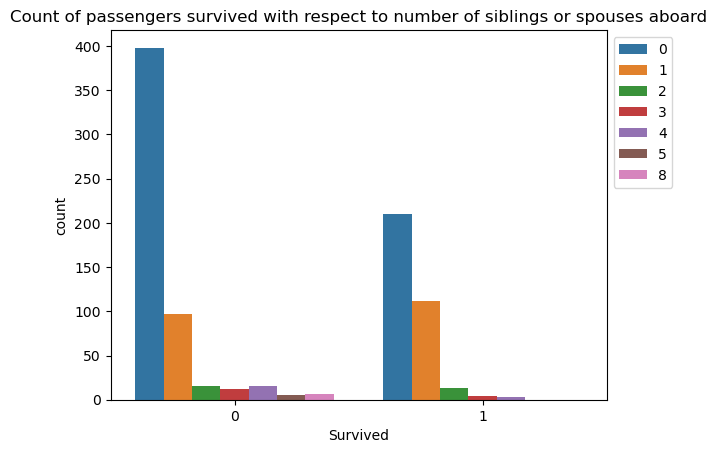

In [142]:
# plotting count of passengers survived with respect to 'SibSp'
sns.countplot(x ='Survived', hue='SibSp', data = data)

# display title
plt.title("Count of passengers survived with respect to number of siblings or spouses aboard")

# display legend in the appropriate position
plt.legend(['0','1','2', '3', '4', '5', '8'], bbox_to_anchor=(1,1));

~SibSp : No. of siblings or spouses aboard. 

~ As SibSp increases , the chances of survival is becoming less. Greater chances of survival for passengers travelling  without any siblings & spouses aboard.

In [143]:
# chance of survival with respect to 'Parch'
data.groupby(['Parch','Survived']).agg({'Survived' :['count']}) 

Survived
                  count
Parch Survived         
0     0             445
      1             233
1     0              53
      1              65
2     0              40
      1              40
3     0               2
      1               3
4     0               4
5     0               4
      1               1
6     0               1

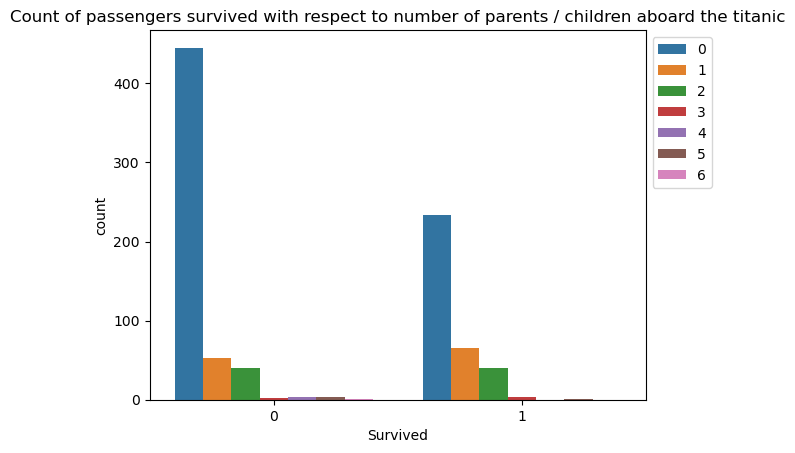

In [144]:
# plotting count of passengers survived with respect to 'Parch'
sns.countplot(x ='Survived', hue='Parch', data = data)

# display title
plt.title("Count of passengers survived with respect to number of parents / children aboard the titanic")

# display legend in the appropriate position
plt.legend(['0','1','2', '3', '4', '5', '6'], bbox_to_anchor=(1,1));

~ parch:   number of parents / children aboard the Titanic.

~ Greater chances of survival for passengers travelling without any parents / children aboard.

In [145]:
# chance of survival with respect to 'Embarked'
data.groupby(['Embarked','Survived']).agg({'Survived' :['count']}) 

Survived
                     count
Embarked Survived         
C        0              75
         1              93
Q        0              47
         1              30
S        0             427
         1             219

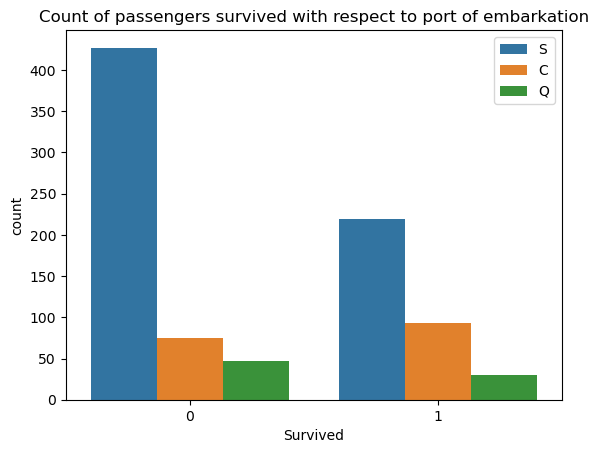

In [146]:
# plotting count of passengers survived with respect to 'Embarked'
sns.countplot(x ='Survived', hue='Embarked', data = data)

# display title
plt.title("Count of passengers survived with respect to port of embarkation")

# display legend
plt.legend();

~ Passengers embarking at 'S' had the best chance of survival than those who embarked at 'Q'.

In [147]:
# number of unique values present in 'Ticket' column
data['Ticket'].nunique()

681

In [148]:
# check for duplicate tickets and their size 
data.groupby('Ticket').size()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64

In [149]:
# display the rows having the same Ticket 
data[data.duplicated(subset='Ticket')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,S
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,S
...,...,...,...,...,...,...,...,...,...,...
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S


In [150]:
# count the number of tickets having ticket = 'LINE'
data.loc[data.Ticket == 'LINE'].groupby('Ticket').agg({'Ticket' : ['count']}) 

,Ticket
,count
Ticket,
LINE,4


~ 4 tickets  = LINE in the dataset

~ There are many duplicate values in the ticket column

~ There are 891 rows in the dataframe, out of which 'Ticket' column is having 681 unique values, so not going to consider it as a feature. Hence duplicate values in 'Ticket' column are not removed from the dataframe.

In [151]:
# count the number of people having Fare = 0.0
data.loc[data.Fare == 0.0].groupby('Fare').agg({'Fare' : ['count']}) 

,Fare
,count
Fare,
0.0,15


~ 15 passengers having Fare = 0.0

In [152]:
# display column names
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [153]:
# count of unique values in 'Name' column
data['Name'].nunique()

891

In [154]:
# count of unique values in 'Ticket' column
data['Ticket'].nunique()

681

~ There are 891 rows in the dataframe. 'Name' column is having 891 unique values and 'Ticket' column is having 681 unique values. It does not contribute much to the machine learning model, hence dropping it.

In [155]:
# dropping 'Name', 'Ticket' and 'Survived' columns and displaying it
A = data.drop(['Name', 'Ticket', 'Survived'], axis=1)
A

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S
888,1,female,19.0,0,0,30.0000,S
889,3,female,28.0,1,2,23.4500,S


#### (*) Correlation

In [156]:
# Correlation performed on numerical features
P = data[numerical_feature]

In [157]:
# creating an instance for correlation
corrmatrix = P.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [158]:
# high and least correlated columns with respect to 'Survived' [target] column
correlation = data.corr()['Survived'].sort_values(ascending = False)

# display high correlated columns
print("\n high correlated columns with respect to Survived column \n\n", correlation.head(3))

# display least correlated columns
print("\n\n least correlated columns with respect to Survived column \n\n", correlation.tail(3))


 high correlated columns with respect to Survived column 

 Survived    1.000000
Fare        0.257307
Parch       0.081629
Name: Survived, dtype: float64


 least correlated columns with respect to Survived column 

 SibSp    -0.035322
Age      -0.064910
Pclass   -0.338481
Name: Survived, dtype: float64


#### (*) Encoding
~ Performing encoding on categorical columns like Sex, Embarked.

In [159]:
# performing one hot encoding 
A=pd.get_dummies(A)

# displaying after applying encoding 
A

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1
889,3,28.0,1,2,23.4500,1,0,0,0,1


#### (*) Scaling

**Min max scaling**

In [160]:
# creating instance
minmax = MinMaxScaler()

In [161]:
# peparing list of columns for scaling
scale_cols=['Age', 'Fare']

In [162]:
# applying min max scaling 
A[scale_cols]=minmax.fit_transform(A[scale_cols])

In [163]:
# display first 5 rows after applying scaling and encoding
A.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,0.271174,1,0,0.014151,0,1,0,0,1
2,1,0.472229,1,0,0.139136,1,0,1,0,0
3,3,0.321438,0,0,0.015469,1,0,0,0,1
4,1,0.434531,1,0,0.103644,1,0,0,0,1
5,3,0.434531,0,0,0.015713,0,1,0,0,1


#### (*) Splitting the data into features and target
~ X = 'Pclass' , 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked' columns

~ y = 'Survived'

In [164]:
# target
y = data['Survived']

In [165]:
# features 
X = A

In [166]:
# distribution of each classes in 'Survived' column
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

~ It is an unbalanced dataset

#### (*) Splitting the data into testing and training dataset

In [167]:
# splitting the data into training and testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### III. Create kNN and SVM models

#### SVM

##### 'linear' kernel

In [168]:
# creating an instance for SVM using linear kernel
svm_lin = SVC(kernel = 'linear') 

In [169]:
# creating model using training data 
svm_linmod = svm_lin.fit(X_train, y_train) 

##### 'rbf' kernel

In [170]:
# creating an instance for SVM  using rbf kernel
svm_rbf = SVC(kernel = 'rbf') 

In [171]:
# creating model using training data 
svm_rbfmod = svm_rbf.fit(X_train, y_train) 

##### 'polynomial' kernel

In [172]:
# creating an instance for SVM  using 'polynomial' kernel
svm_poly = SVC(kernel='poly') 

In [173]:
# creating model using training data 
svm_polmod = svm_poly.fit(X_train, y_train) 

### IV. Do k-fold and  stratified k-fold cross validation techniques and find the average accuracy score of the models

#### 1) K Fold Cross Validation

In [174]:
# specifying number of folds as 3
kfold_validator= KFold(3) 

In [175]:
# using kfold_validator for splitting X and y, checking which all index are given for training and testing
for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)
    print("\n\n")

Training Index: [297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494
 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530
 531 532 533 534 535 536 537 538 53

**A) kNN**

In [176]:
# create empty list
mean_k = []

# take values from 3 to 14 and store it in array format 
neighbors = np.arange(3,15)  

#  k refers to the number of neighbors that we're going to use to make our prediction 
for k in neighbors:
    
    # creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the model with the training data
    knn_model = knn.fit(X_train, y_train) 
    
    # calculate accuracy
    cv_knnresult = cross_val_score(knn_model, X, y, cv=kfold_validator)
    
    # display k value
    print(f"k:{k}")
    
    # accuracy for each fold
    print(f"\n Accuracy of each fold : {cv_knnresult}")
    
    # calculate mean of accuracy
    mean = np.mean(cv_knnresult)
    print(f"\n Mean = {mean}\n\n\n")
    
    # appending mean of accuracy to the empty list
    mean_k.append(mean)

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

k:3

 Accuracy of each fold : [0.74747475 0.81144781 0.78787879]

 Mean = 0.7822671156004489



k:4

 Accuracy of each fold : [0.76430976 0.79124579 0.8013468 ]

 Mean = 0.7856341189674523



k:5

 Accuracy of each fold : [0.76094276 0.79124579 0.79124579]

 Mean = 0.7811447811447811





E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

k:6

 Accuracy of each fold : [0.79124579 0.78787879 0.79124579]

 Mean = 0.7901234567901234



k:7

 Accuracy of each fold : [0.78787879 0.7979798  0.79461279]

 Mean = 0.7934904601571269





E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

k:8

 Accuracy of each fold : [0.80808081 0.8047138  0.81144781]

 Mean = 0.8080808080808081



k:9

 Accuracy of each fold : [0.8013468  0.81481481 0.7979798 ]

 Mean = 0.8047138047138048



k:10

 Accuracy of each fold : [0.82154882 0.81144781 0.8013468 ]

 Mean = 0.8114478114478114





E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

k:11

 Accuracy of each fold : [0.81481481 0.79461279 0.81481481]

 Mean = 0.8080808080808081



k:12

 Accuracy of each fold : [0.81818182 0.81481481 0.81481481]

 Mean = 0.8159371492704826



k:13

 Accuracy of each fold : [0.80808081 0.81144781 0.82154882]

 Mean = 0.8136924803591471



k:14

 Accuracy of each fold : [0.81481481 0.80808081 0.81144781]

 Mean = 0.8114478114478114





E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

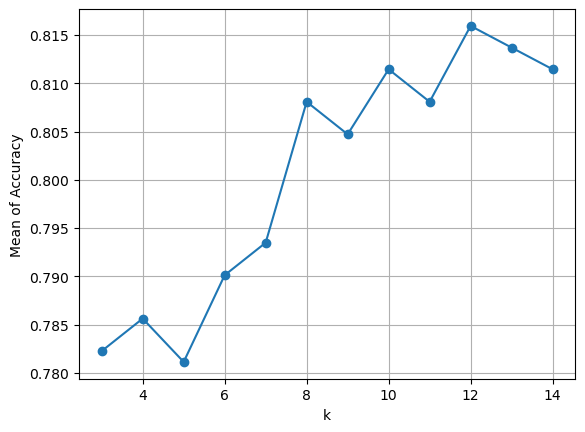

In [177]:
# plot k values versus mean of accuracy
plt.plot(neighbors, mean_k, 'o-') 

# display label on x-axis
plt.xlabel('k')

# display label on y-axis
plt.ylabel('Mean of Accuracy')

# display grid
plt.grid()

~ from the above display, k = 12 having highest mean accuracy  

In [178]:
# creating an instance using k = 12
knn = KNeighborsClassifier(n_neighbors=12) 
    
# fitting the model with the training data
knn_model = knn.fit(X_train, y_train) 
    
# calculate accuracy and display it
cv_knnresult = cross_val_score(knn_model, X, y, cv=kfold_validator)
cv_knnresult

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

array([0.81818182, 0.81481481, 0.81481481])

In [179]:
# display mean of accuracy
np.mean(cv_knnresult)

0.8159371492704826

**B) SVM**

##### 'linear' kernel

In [180]:
# calculate accuracy and display it
cv_svmlinresult = cross_val_score(svm_linmod, X, y, cv=kfold_validator)
cv_svmlinresult

array([0.7979798 , 0.78787879, 0.77777778])

In [181]:
# display mean of accuracy
np.mean(cv_svmlinresult)

0.787878787878788

##### 'rbf' kernel

In [182]:
# calculate accuracy and display it
cv_svmrbfresult = cross_val_score(svm_rbfmod, X, y, cv=kfold_validator)
cv_svmrbfresult

array([0.8047138 , 0.81144781, 0.80808081])

In [183]:
# display mean of accuracy
np.mean(cv_svmrbfresult)

0.8080808080808081

##### 'polynomial' kernel

In [184]:
# calculate accuracy and display it
cv_svmpolresult = cross_val_score(svm_polmod, X, y, cv=kfold_validator)
cv_svmpolresult

array([0.7979798 , 0.81144781, 0.81144781])

In [185]:
# display mean of accuracy
np.mean(cv_svmpolresult)

0.8069584736251403

#### 2) Stratified Cross Validation

In [186]:
# specifying number of splits as 3
skfold_validator = StratifiedKFold(n_splits=3)

In [187]:
# using skfold_validator for splitting X and y, checking which all index are given for training and testing
for train_index, test_index in skfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)
    print("\n\n")

Training Index: [284 285 287 292 293 294 295 296 297 302 304 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494
 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530
 531 532 533 534 535 536 537 538 53

**A) kNN**

In [188]:
# create empty list 
mean_k = []

# take values from 3 to 14 and store it in array format 
neighbors = np.arange(3,15)  

#  k refers to the number of neighbors that we're going to use to make our prediction 
for k in neighbors:
    
    # creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the model with the training data
    knn_model = knn.fit(X_train, y_train) 
    
    # calculate accuracy 
    skcv_knnresult = cross_val_score(knn_model, X, y, cv=skfold_validator)
    
    # display k value
    print(f"k:{k}")
    
    # accuracy of each fold
    print(f"\n Accuracy of each fold : {skcv_knnresult}")
    
    # calculate mean of accuracy
    mean = np.mean(skcv_knnresult)
    print(f"\n Mean = {mean}\n\n")
    
    # appending mean of accuracy to the empty list
    mean_k.append(mean)

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

k:3

 Accuracy of each fold : [0.75420875 0.81818182 0.79124579]

 Mean = 0.787878787878788


k:4

 Accuracy of each fold : [0.77441077 0.81144781 0.79461279]

 Mean = 0.7934904601571269


k:5

 Accuracy of each fold : [0.76430976 0.8013468  0.78787879]

 Mean = 0.7845117845117846




E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

k:6

 Accuracy of each fold : [0.7979798  0.8047138  0.78451178]

 Mean = 0.7957351290684623


k:7

 Accuracy of each fold : [0.7979798  0.81144781 0.78451178]

 Mean = 0.797979797979798


k:8

 Accuracy of each fold : [0.81481481 0.80808081 0.8013468 ]

 Mean = 0.8080808080808081




E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

k:9

 Accuracy of each fold : [0.8047138  0.8047138  0.79124579]

 Mean = 0.8002244668911335


k:10

 Accuracy of each fold : [0.81818182 0.81144781 0.8013468 ]

 Mean = 0.8103254769921437


k:11

 Accuracy of each fold : [0.80808081 0.8047138  0.80808081]

 Mean = 0.8069584736251403




E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

k:12

 Accuracy of each fold : [0.81481481 0.82154882 0.8047138 ]

 Mean = 0.8136924803591471


k:13

 Accuracy of each fold : [0.8047138  0.81144781 0.81144781]

 Mean = 0.8092031425364757


k:14

 Accuracy of each fold : [0.80808081 0.81481481 0.8047138 ]

 Mean = 0.8092031425364757




E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

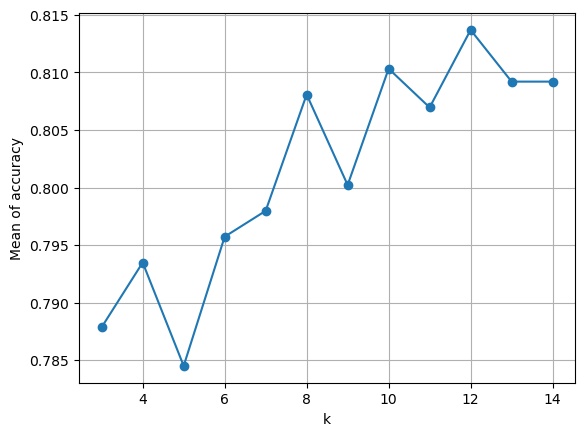

In [189]:
# plot k values versus mean of accuracy
plt.plot(neighbors, mean_k, 'o-')

# display label on the x-axis
plt.xlabel('k')

# display label on the y-axis
plt.ylabel('Mean of accuracy')

# display grid
plt.grid()

~ from the above display, k = 12 is having highest mean accuracy 

In [190]:
# creating an instance using k = 12
knn = KNeighborsClassifier(n_neighbors=12) 
    
# fitting the model with the training data
knn_model = knn.fit(X_train, y_train) 
    
# calculate accuracy 
skcv_knnresult = cross_val_score(knn_model, X, y, cv=skfold_validator)

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [191]:
# display mean of accuracy
np.mean(skcv_knnresult)

0.8136924803591471

**B) SVM**

##### 'linear' kernel

In [192]:
# calculate accuracy and display it
skcv_svmlinresult = cross_val_score(svm_linmod, X, y, cv=skfold_validator)
skcv_svmlinresult

array([0.78787879, 0.8013468 , 0.77104377])

In [193]:
# display mean of accuracy
np.mean(skcv_svmlinresult)

0.7867564534231201

##### 'rbf' kernel

In [194]:
# calculate accuracy and display it
skcv_svmrbfresult = cross_val_score(svm_rbfmod, X, y, cv=skfold_validator)
skcv_svmrbfresult

array([0.8047138 , 0.82491582, 0.8013468 ])

In [195]:
# display mean of accuracy
np.mean(skcv_svmrbfresult)

0.8103254769921437

##### 'polynomial' kernel

In [196]:
# calculate accuracy and display it
skcv_svmpolresult = cross_val_score(svm_polmod, X, y, cv=skfold_validator)
skcv_svmpolresult

array([0.8047138 , 0.82828283, 0.8047138 ])

In [197]:
# display mean of accuracy
np.mean(skcv_svmpolresult)

0.8125701459034792

**ACCURACY OF DIFFERENT MODELS**
********************************
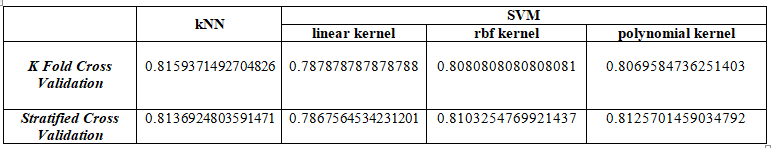